In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glacier import *
from tributary import *

# ELA_0 = np.genfromtxt("ELA_spitsbergen.txt")
ELA_0 = np.genfromtxt("ELAdata000.txt")
ELA_1 = np.genfromtxt("ELAdata001.txt")
ELA_2 = np.genfromtxt("ELAdata002.txt")
ELA_4 = np.genfromtxt("ELAdata004.txt")

[x1,y1] = np.genfromtxt("elevation_1.txt")

tributary_data = np.genfromtxt('Glacierbuckets.csv', delimiter=";", skip_header=1, usecols=(1,2,3,4,5,6,7))

parameters = [alpha, beta, nu, kappa, c, w, L0, E0s, E0w] = np.genfromtxt("parameters_veteranen.txt")

# ELA_0w = ELA_0 + [0,E0w]
# ELA_1w = ELA_1 + [0,E0w]
# ELA_2w = ELA_2 + [0,E0w]
# ELA_4w = ELA_4 + [0,E0w]

ELA_0s = ELA_0 + [0,E0s]
ELA_1s = ELA_1 + [0,E0s]
ELA_2s = ELA_2 + [0,E0s]
ELA_4s = ELA_4 + [0,E0s]

figsize = (8,4)
dpi = 300

In [2]:
v0s = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=ELA_0s[0,0], E=ELA_0s[0,1], name="0.00 K/yr")
v1s = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=ELA_1s[0,0], E=ELA_1s[0,1], name="0.01 K/yr")
v2s = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=ELA_2s[0,0], E=ELA_2s[0,1], name="0.02 K/yr")
v4s = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=ELA_4s[0,0], E=ELA_4s[0,1], name="0.04 K/yr")

# v0w = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=ELA_0w[0,0], E=ELA_0w[0,1], name="0.00 K/yr")
# v1w = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=ELA_1w[0,0], E=ELA_1w[0,1], name="0.01 K/yr")
# v2w = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=ELA_2w[0,0], E=ELA_2w[0,1], name="0.02 K/yr")
# v4w = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=ELA_4w[0,0], E=ELA_4w[0,1], name="0.04 K/yr")

glaciers_s = [v0s, v1s, v2s, v4s]
# glaciers_w = [v0w, v1w, v2w, v4w]
glaciers_w = []
glaciers = glaciers_s + glaciers_w

for glacier in glaciers:   
    glacier.width_glacier = 2930
    for [L, w0, h0, w1, h1, s, q] in tributary_data:
        glacier.add_bucket_tributary(L, w0, w1, h0, h1)

t = 1 #year
dt = 0.1

# print(glaciers_w[0])
# for i in range(np.shape(ELA_0)[0]-1):
#     # change E at the start of each year
#     glaciers_w[0].integrate(dt, t, E=ELA_0w[i+1,1])

print(glaciers_s[0])
for i in range(np.shape(ELA_0)[0]-1):
    # change E at the start of each year
    glaciers_s[0].integrate(dt, t, E=ELA_0s[i+1,1])

# print(glaciers_w[1])
# for i in range(np.shape(ELA_1)[0]-1):
#     # change E at the start of each year
#     glaciers_w[1].integrate(dt, t, E=ELA_1w[i+1,1])

print(glaciers_s[1])
for i in range(np.shape(ELA_1)[0]-1):
    # change E at the start of each year
    glaciers_s[1].integrate(dt, t, E=ELA_1s[i+1,1])

# print(glaciers_w[1])
# for i in range(np.shape(ELA_2)[0]-1):
#     # change E at the start of each year
#     glaciers_w[2].integrate(dt, t, E=ELA_2w[i+1,1])

print(glaciers_s[2])
for i in range(np.shape(ELA_2)[0]-1):
    # change E at the start of each year
    glaciers_s[2].integrate(dt, t, E=ELA_2s[i+1,1])

# print(glaciers_w[2])
# for i in range(np.shape(ELA_4)[0]-1):
#     # change E at the start of each year
#     glaciers_w[3].integrate(dt, t, E=ELA_4w[i+1,1])

print(glaciers_s[3])
for i in range(np.shape(ELA_4)[0]-1):
    # change E at the start of each year
    glaciers_s[3].integrate(dt, t, E=ELA_4s[i+1,1])

Minimum Glacier Model for a custom bed: 0.00 K/yr
Minimum Glacier Model for a custom bed: 0.01 K/yr
Minimum Glacier Model for a custom bed: 0.02 K/yr
Minimum Glacier Model for a custom bed: 0.04 K/yr


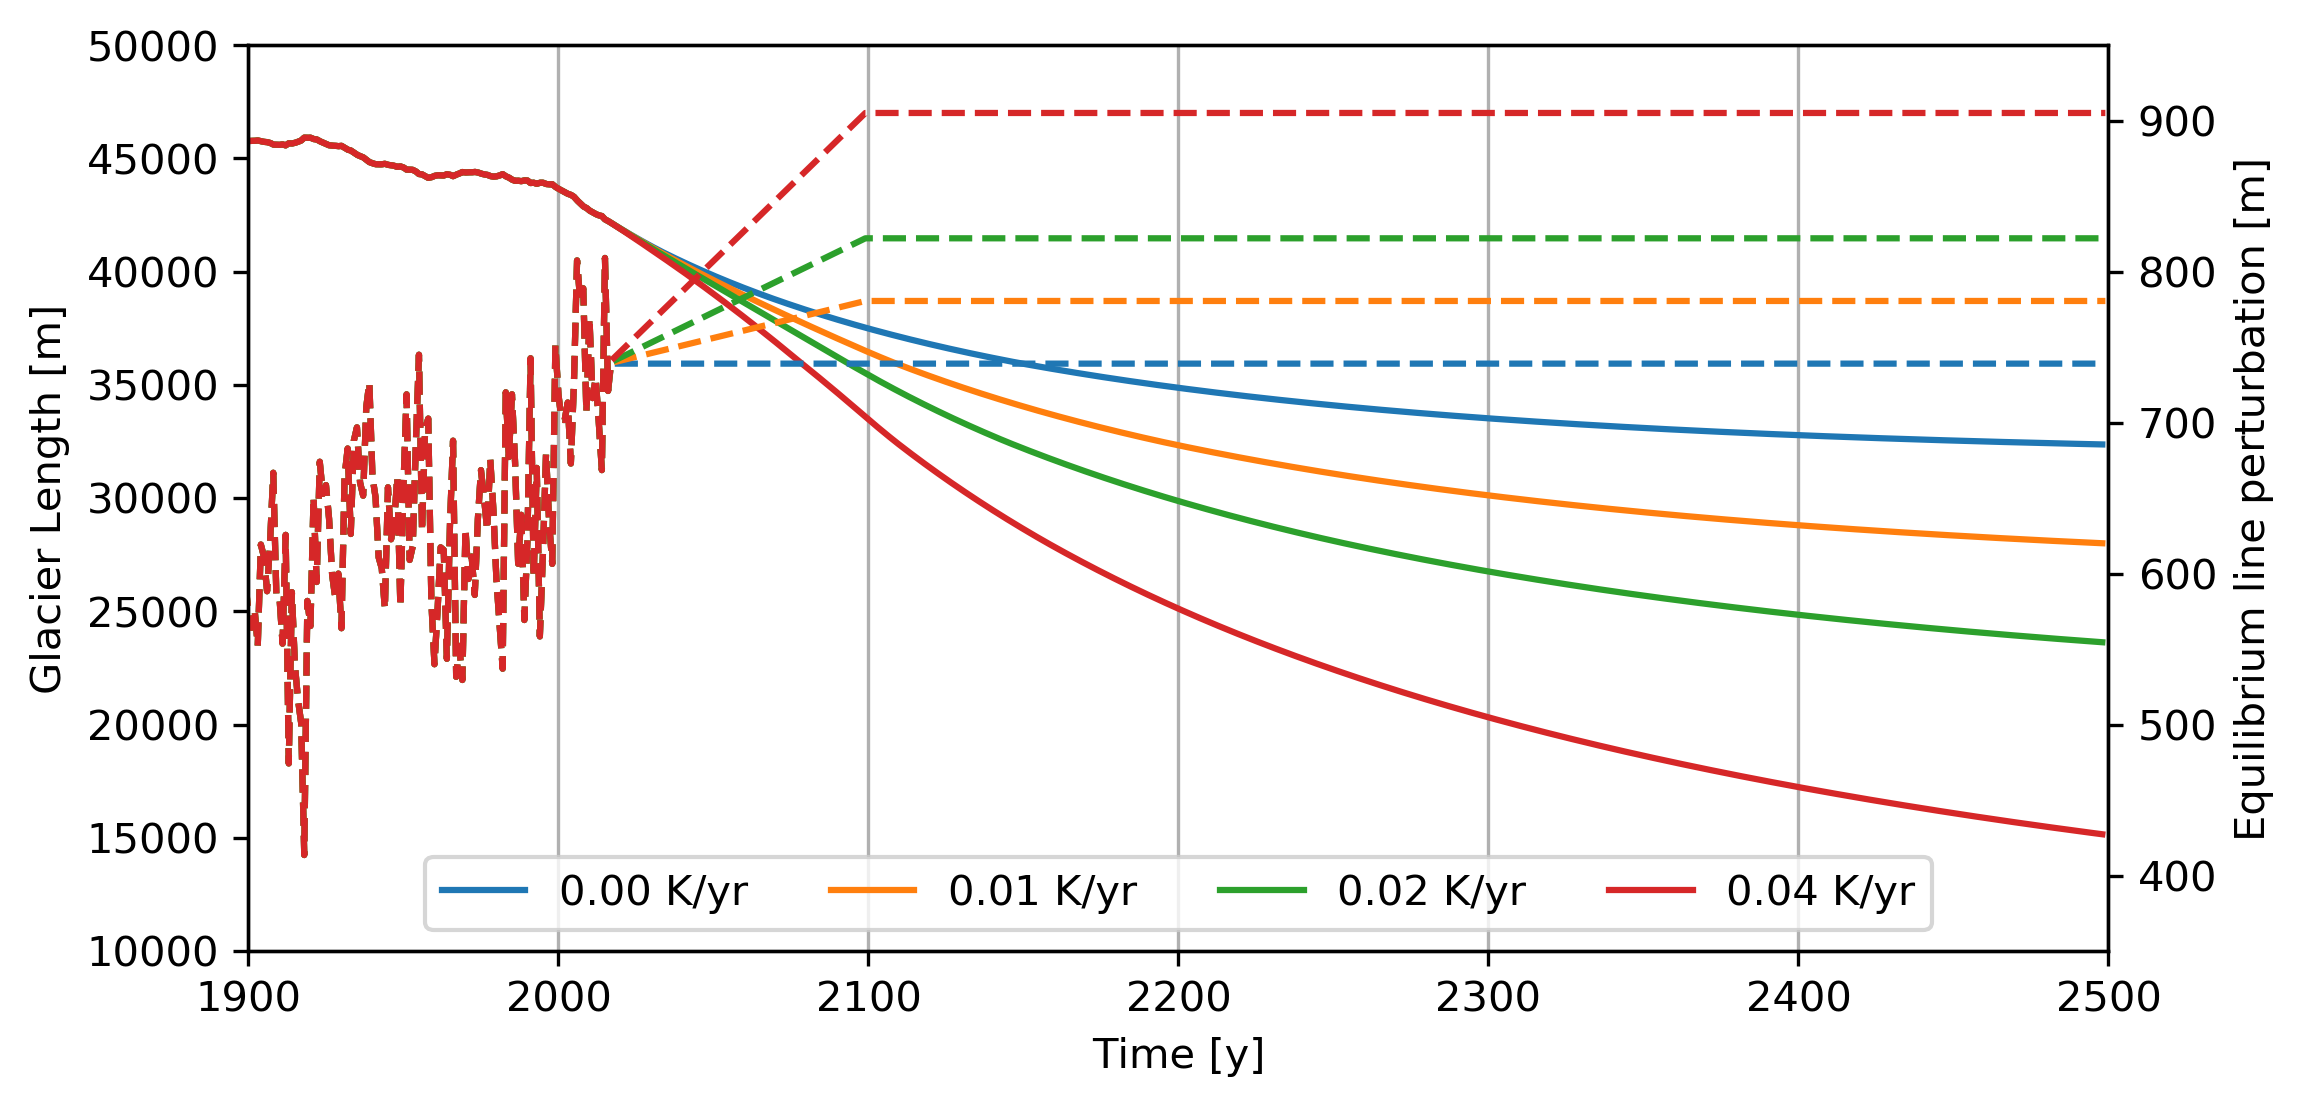

In [3]:
fig, ax1 = plt.subplots()
fig.set_size_inches(figsize)
fig.set_dpi(dpi)

glaciers_s = [v0s, v1s, v2s, v4s]
# glaciers_w = [v0w, v1w, v2w, v4w]
# glaciers = glaciers_s + glaciers_w

for glacier in glaciers_s:
    ax1.plot(glacier.t, glacier.L, label=glacier.name)
    
plt.legend(loc="lower center", ncol=4)
plt.grid(axis="x")
# plt.title("Glacier length")

# ax1.plot([-5000, 5000], 2*[45000], "--", c="gray", linewidth=1) # sea
ax1.set_ylim(10000, 50000)
# ax1.set_yticks(np.arange(35000, 75001, 10000))

plt.xlim([1900, 2500])
plt.xlabel("Time [y]")
plt.ylabel("Glacier Length [m]")


ax2 = ax1.twinx()    
ax2.plot(ELA_0[:,0], ELA_0[:,1], "--")
ax2.plot(ELA_1[:,0], ELA_1[:,1], "--")
ax2.plot(ELA_2[:,0], ELA_2[:,1], "--")
ax2.plot(ELA_4[:,0], ELA_4[:,1], "--")
ax2.set_ylabel("Equilibrium line perturbation [m]")
ax2.set_ylim([350, 950])


plt.savefig("figures/veteranen_future_summer.png")
plt.show()

In [4]:
# fig, ax1 = plt.subplots()
# fig.set_size_inches(figsize)
# fig.set_dpi(dpi)

# for glacier in glaciers_w:
#     ax1.plot(glacier.t, glacier.L, label=glacier.name)
    
# plt.legend(loc="lower center", ncol=4)
# plt.grid(axis="x")
# # plt.title("Glacier length")

# # ax1.plot([-5000, 5000], 2*[45000], "--", c="gray", linewidth=1) # sea
# ax1.set_ylim(30000, 70000)
# # ax1.set_yticks(np.arange(35000, 75001, 10000))

# plt.xlim([1900, 2500])
# plt.xlabel("Time [y]")
# plt.ylabel("Glacier Length [m]")


# ax2 = ax1.twinx()    
# ax2.plot(ELA_0[:,0], ELA_0[:,1], "--")
# ax2.plot(ELA_1[:,0], ELA_1[:,1], "--")
# ax2.plot(ELA_2[:,0], ELA_2[:,1], "--")
# ax2.plot(ELA_4[:,0], ELA_4[:,1], "--")
# ax2.set_ylabel("Equilibrium line perturbation [m]")
# ax2.set_ylim([350, 950])


# plt.savefig("figures/veteranen_future_winter.png")
# plt.show()

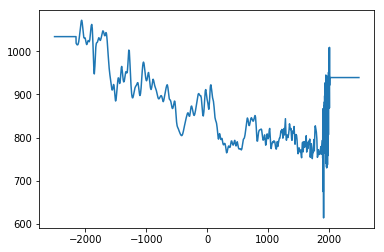

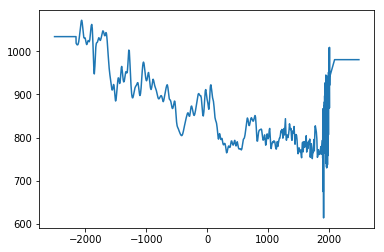

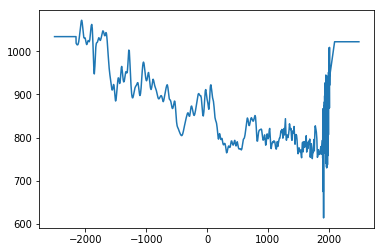

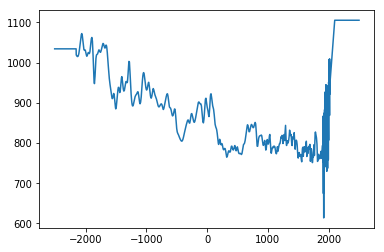

In [5]:
plt.plot(ELA_0s[:,0], ELA_0s[:,1])
# plt.plot(ELA_0w[:,0], ELA_0w[:,1])
plt.show()
plt.plot(ELA_1s[:,0], ELA_1s[:,1])
# plt.plot(ELA_1w[:,0], ELA_1w[:,1])
plt.show()
plt.plot(ELA_2s[:,0], ELA_2s[:,1])
# plt.plot(ELA_2w[:,0], ELA_2w[:,1])
plt.show()
plt.plot(ELA_4s[:,0], ELA_4s[:,1])
# plt.plot(ELA_4w[:,0], ELA_4w[:,1])
plt.show()